# pyICON.view for SMT ocean data

Load the necessary modules:

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#import pyicon_jupyter as jup
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np

## Specify data set

Define a dataset with giving the path to the data and information about the triangular grid and the regular grid. The regular grid needs to be created in advance (use pyic.calc_ckdtree for that).

In [3]:
run = 'ngSMT_tke'
runname = ''
gname = 'smt'
lev = ''

path_data     = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res1.00_180W-180E_90S-90N.npz'

In [4]:
IcD = pyic.IconData(
    fname        = run+'_vort_f_50m_????????????????.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev, 
    model_type   = 'oce',
    rgrid_name   = "",
    do_triangulation     = False,
    omit_last_file       = True,
    calc_coeff           = False,
    load_triangular_grid = True,
    load_vertical_grid   = False,
    load_rectangular_grid= True,
    verbose          = True,
    time_mode        = 'float2date',
              )
# Fake depth data
IcD.depthc=np.arange(77)

-v-: set paths and fnames
-v-: set global variables
-v-: find  ckdtrees etc.
::: Warning: Could not find any section-npz-file in /mnt/lustre01/work/mh0033/m300602/icon/grids/smt/ckdtree/sections/. :::
::: Warning: no section found.:::
-v-: load tgrid
-v-: load rgrid
-v-: list of variables and time steps


## Plotting on a regular grid

In [5]:
IcD.rgrid_names

array(['global_0.02', 'global_0.1', 'global_0.3', 'global_1.0'],
      dtype='<U200')

In [6]:
rgrid_fpath = '/mnt/lustre01/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.30_180W-180E_90S-90N.npz'
ddnpz = np.load(rgrid_fpath)
ickdtree_c = ddnpz['ickdtree_c']
ickdtree_c.shape

(720000,)

<IPython.core.display.Javascript object>


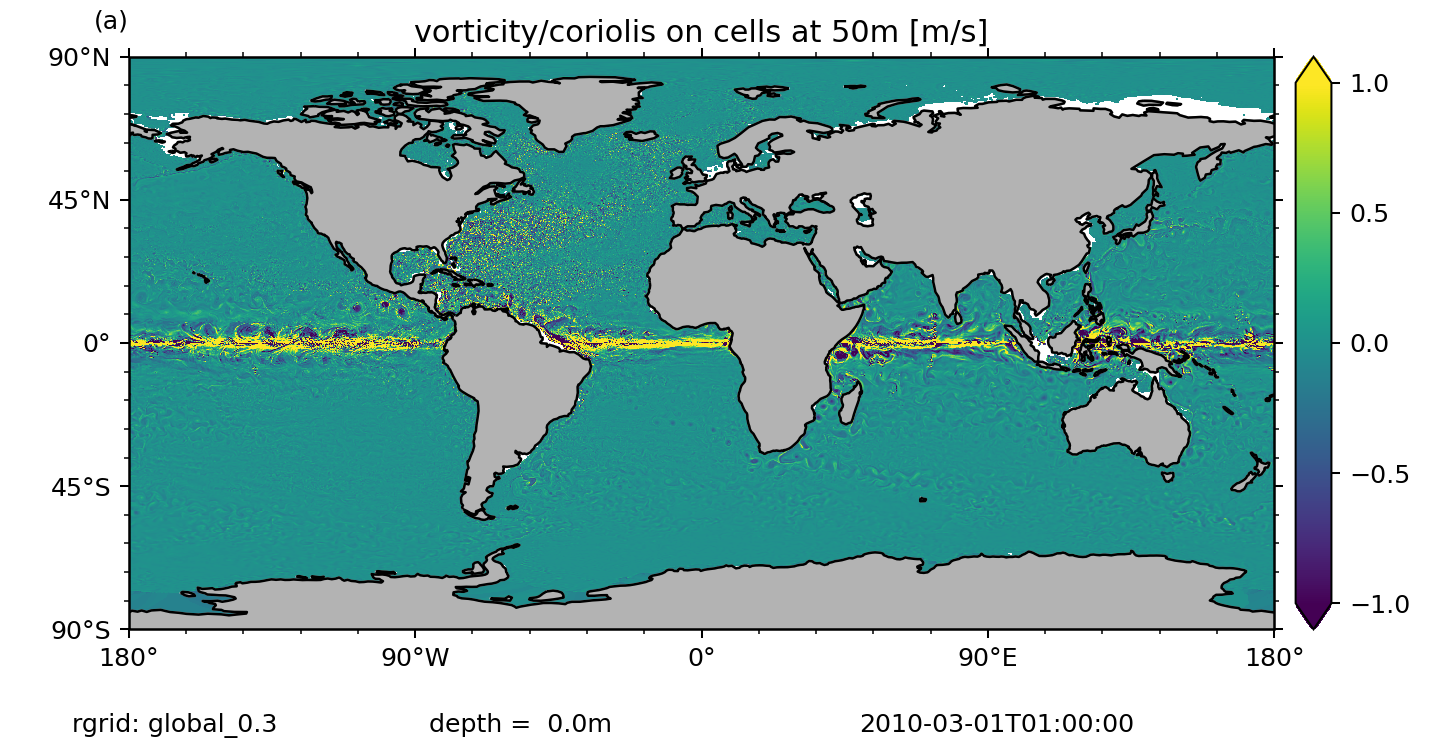

Output()

In [7]:
PyicV = pyic.view.hplot(IcD, use_tgrid=False, logplot=False, verbose=False)

<IPython.core.display.Javascript object>


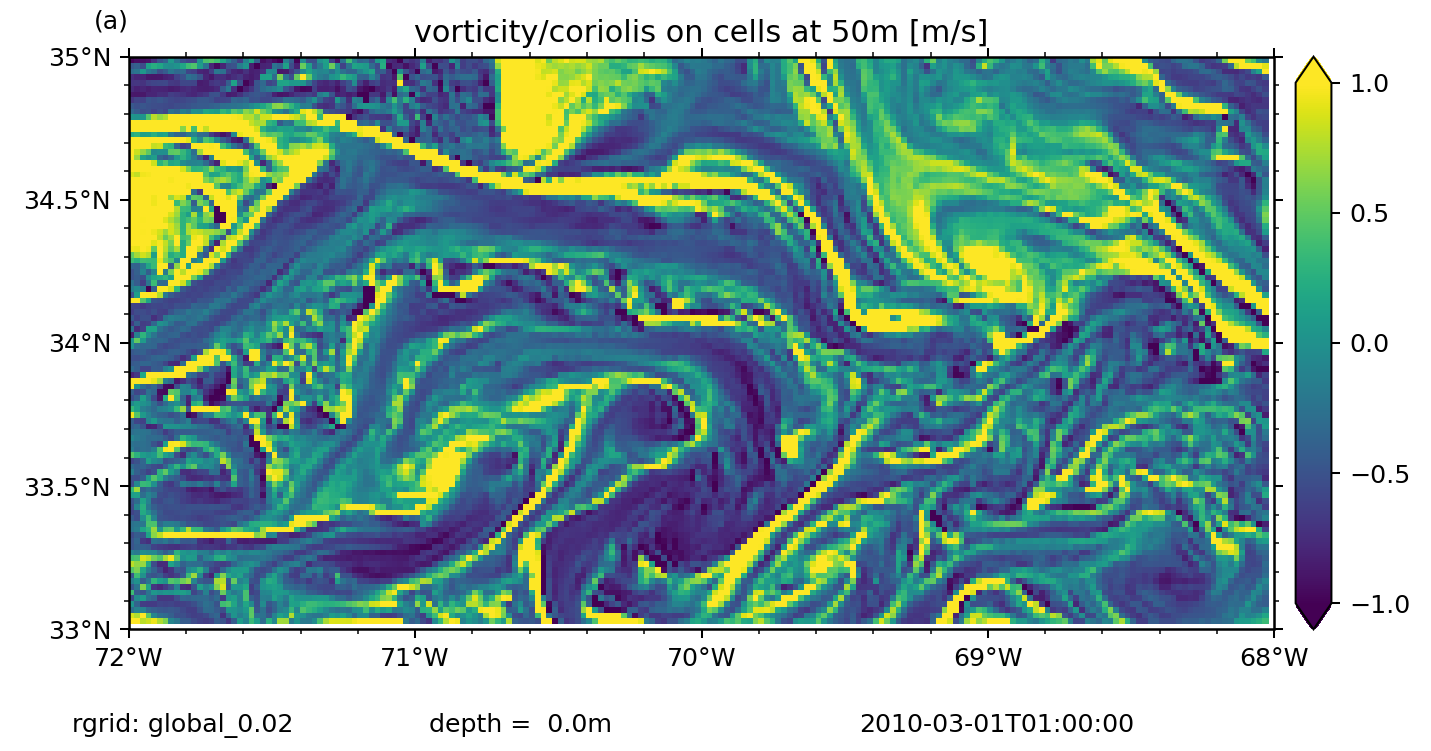

Output()

In [8]:
# lon_reg = [-75, -55]
# lat_reg = [30, 40]
lon_reg = [-72, -68]
lat_reg = [33, 35]
PyicV = pyic.view.hplot(IcD, use_tgrid=False, logplot=False, verbose=False, 
                        lon_reg=lon_reg, lat_reg=lat_reg, rgrid_name='global_0.02')

## Plotting on the original grid

Select a small region. Otherwise it takes too long.

-v-: parameters
-v-: make_triangulation
-v-: initialize_plot
-v-: load_hsnap
Loading vort_f_cells_50m from /mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/ngSMT_tke_vort_f_50m_20100301T010000Z.nc
100.0


<IPython.core.display.Javascript object>


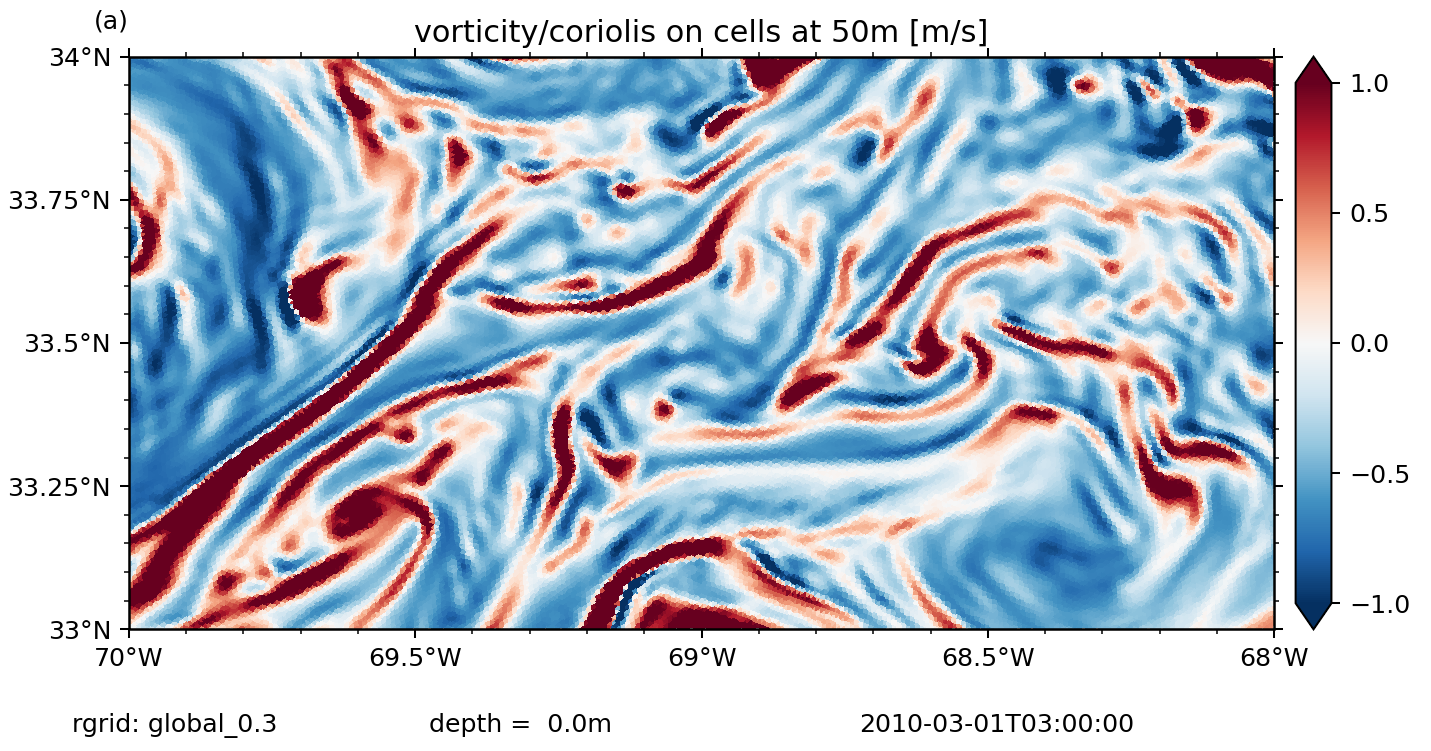

-v-: Done initializing!
-v-: widgets


Output(outputs=({'output_type': 'stream', 'text': 'Loading h_sp from /mnt/lustre01/work/mh0287/users/leonidas/…

In [41]:
# lon_reg = [-72, -68]
# lat_reg = [33, 35]
lon_reg = [-70, -68]
lat_reg = [33, 34]
PyicV = pyic.view.hplot(IcD, use_tgrid=True, logplot=False, verbose=True, lon_reg=lon_reg, lat_reg=lat_reg)

In [32]:
PyicV.IcD.use_tgrid

False